In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

matplotlib.style.use('fivethirtyeight')
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rcParams['xtick.major.pad']='10'
matplotlib.rcParams['ytick.major.pad']='10'
#print(check_output(["ls", "/Users/harishbharatham/Downloads/"]).decode("utf8"))

In [44]:
df_list = [pd.read_csv('/Users/harishbharatham/Downloads/studentscores-%s.csv'%course) for course in ['stt', 'pyt']]
df_list[0]['class'] = 'stt'
df_list[1]['class'] = 'pyt'
df = df_list[0].append(df_list[1])
F_count = df.groupby(['sex'])['school'].count()[0]
M_count = df.groupby(['sex'])['school'].count()[1]
#df.info()

In [45]:
#data cleaning
df.age = df.age.fillna('')
df.address = df.address.fillna('')
df.failures = df.failures.fillna('')
df.higher = df.higher.fillna('')
df.internet = df.internet.fillna('')
df.health = df.health.fillna('')
df.absences = df.absences.fillna('')
df.dropna()
df['sex'].str.upper()
df['address'].str.lower()
df['address'].str.strip()

0      U
1      U
2      U
3      U
4      U
5      U
6      U
7      U
8      U
9      U
10     U
11     U
12     U
13     U
14     U
15     U
16     U
17     U
18     U
19     U
20     U
21     U
22     U
23     U
24     R
25     U
26     U
27     U
28     U
29     U
      ..
619    U
620    U
621    R
622    R
623    U
624    R
625    U
626    R
627    R
628    U
629    R
630    R
631    R
632    R
633    R
634    U
635    R
636    U
637    R
638    U
639    R
640    R
641    R
642    U
643    R
644    R
645    U
646    U
647    U
648    R
Name: address, Length: 1044, dtype: object

1
2


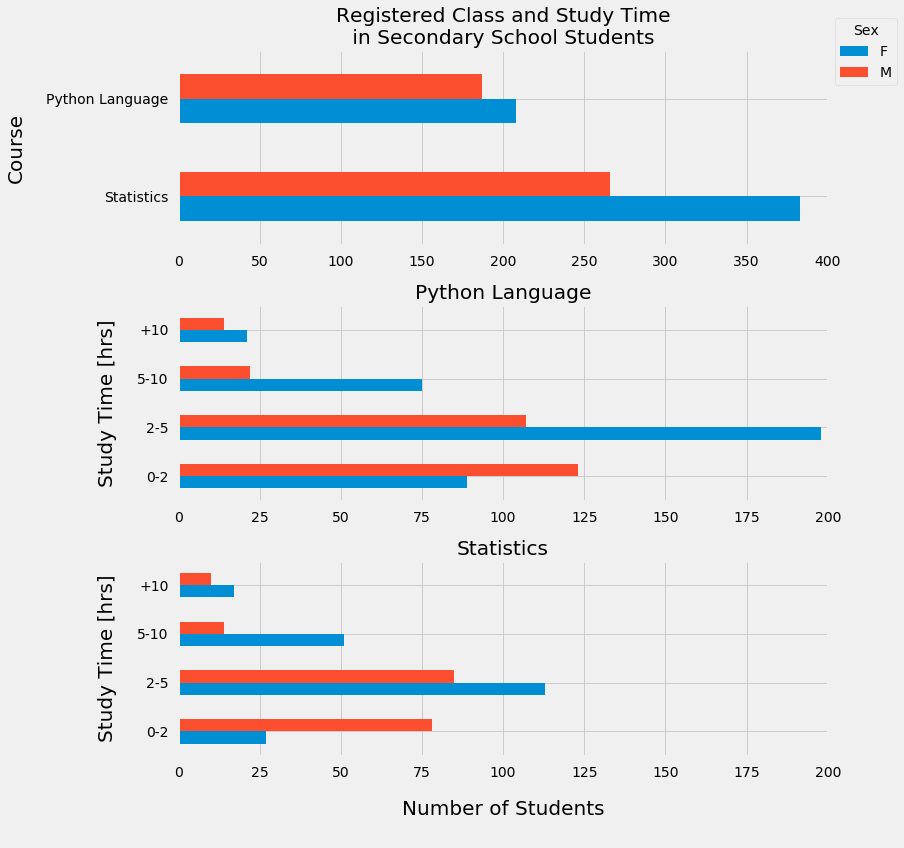

In [46]:
matplotlib.style.use('fivethirtyeight')
fig, axes = plt.subplots(3,1,figsize=(12,12))
df_temp = df.groupby(['class','sex']).size().to_frame(name='Count').reset_index()
df_temp2 = df_temp.pivot(index='class', columns='sex', values='Count')
ax = df_temp2.plot(ax=axes[0], kind='barh', stacked=False,legend=False)#, figsize=(12,4))#, color=('black','limegreen'))
#ax.set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_ylabel("Course", fontsize=20, labelpad = 20)
ax.set_yticklabels(['Statistics','Python Language'])
ax.set_xlim([0,400])
i=0
for classname, fullclassname in zip(['pyt','stt'], ['Python Language','Statistics']):
    i+=1
    print(i)
    df_temp = df[df['class']==classname].groupby(['studytime','sex']).size().to_frame(name='Count').reset_index()
    df_temp2 = df_temp.pivot(index='studytime', columns='sex', values='Count')
    ax = df_temp2.plot(ax=axes[i],kind='barh', stacked=False, legend=False)#,sharex=axes[0])#, figsize=(12,4))
    ax.set_ylabel("Study Time [hrs]", fontsize=20, labelpad = 20)
    axes[i].set_title(fullclassname)
#studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    ax.set_yticklabels(['0-2','2-5','5-10','+10'])
    ax.set_xlim([0,200])

ax.set_xlabel("Number of Students\n", fontsize=20, labelpad = 20)
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
axes[0].set_title('Registered Class and Study Time\n in Secondary School Students ')
fig.tight_layout()

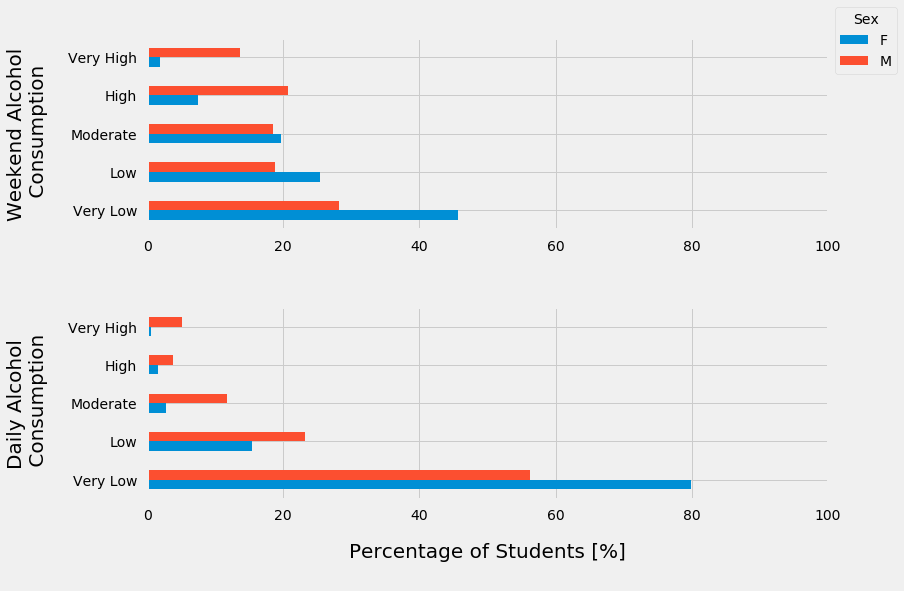

In [47]:
matplotlib.style.use('fivethirtyeight')
fig, axes = plt.subplots(2,1,figsize=(12,8))

i=0
for alc, label in zip(['Walc','Dalc'],['Weekend','Daily']):
    df_temp = df.groupby([alc,'sex']).size().to_frame(name='Count').reset_index()
    df_temp.loc[(df_temp['sex']=='M'),'Count'] = 100*df_temp[(df_temp['sex']=='M')]['Count']/M_count
    df_temp.loc[(df_temp['sex']=='F'),'Count'] = 100*df_temp[(df_temp['sex']=='F')]['Count']/F_count
    df_temp2 = df_temp.pivot(index=alc, columns='sex', values='Count')
    ax = df_temp2.plot(ax=axes[i], kind='barh', stacked=False, legend=False)#, figsize=(12,4))
    ax.set_xlabel("Percentage of Students [%]\n", fontsize=20, labelpad = 20)
    ax.set_ylabel("%s Alcohol\n Consumption"%label, fontsize=20, labelpad = 20)
    #Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    ax.set_yticklabels(['Very Low','Low','Moderate','High','Very High'])
    ax.set_xlim([0,100])
    i+=1
axes[0].set_xlabel(" ", fontsize=20, labelpad = 20)
ax.set_xlabel("Percentage of Students [%]\n", fontsize=20, labelpad = 20)
leg = axes[0].legend(bbox_to_anchor=(1,1.2), loc='upper left', ncol=1)
leg.set_title('Sex')
fig.tight_layout()

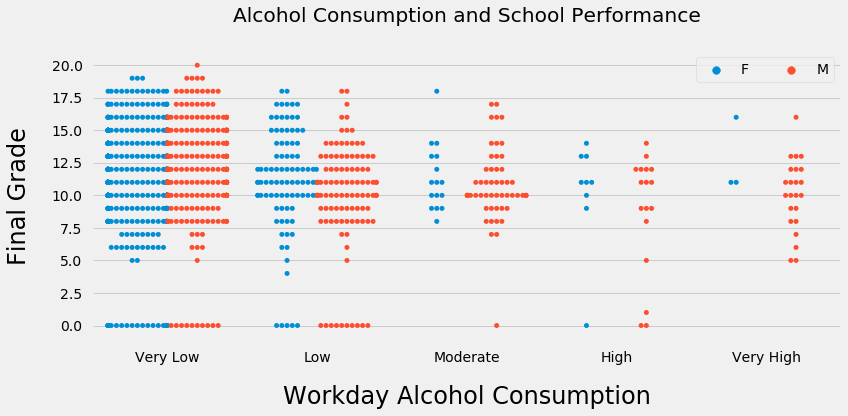

In [48]:
matplotlib.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.swarmplot(x='Dalc',y='G3',hue='sex', data=df,dodge=True)
ax.set_xlabel("Workday Alcohol Consumption", fontsize=24, labelpad = 20)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['Very Low','Low','Moderate','High','Very High'],rotation=0)
ax.set_title('Alcohol Consumption and School Performance\n')
ax.legend(ncol=2,loc='upper right')
fig.tight_layout()

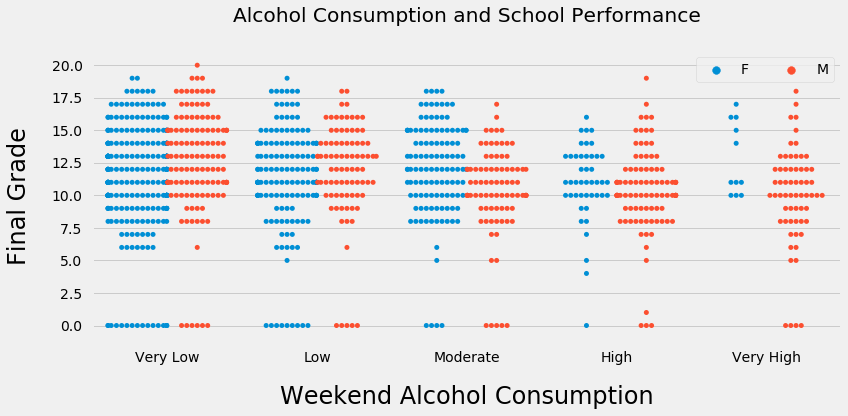

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.swarmplot(x='Walc',y='G3',hue='sex', data=df,dodge=True)
ax.set_xlabel("Weekend Alcohol Consumption", fontsize=24, labelpad = 20)
ax.set_ylabel("Final Grade", fontsize=24, labelpad = 20)
ax.set_xticklabels(['Very Low','Low','Moderate','High','Very High'],rotation=0)
ax.set_title('Alcohol Consumption and School Performance\n')
ax.legend(ncol=2,loc='upper right')
fig.tight_layout()

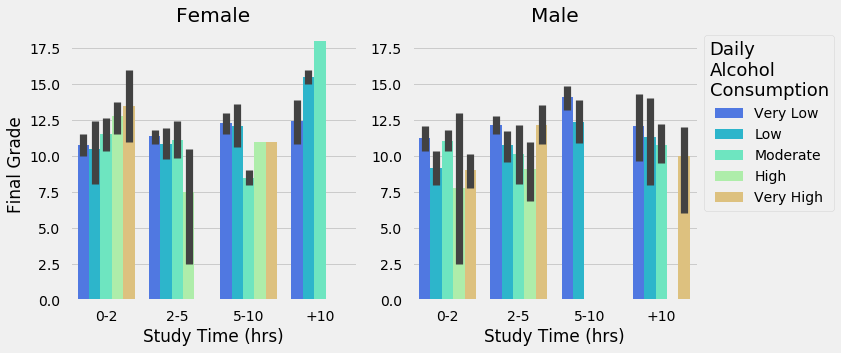

In [50]:
sns.set_palette("rainbow")
g = sns.factorplot(x="studytime", y="G3", hue='Dalc', data=df,
               col="sex", kind="bar",size=5, aspect=1,legend=False,dodge=True); 
#g = sns.barplot(x="studytime", y="G3", hue='Dalc', data=df);
#,
               #col="sex", kind="swarm",size=5, aspect=1,legend=False,dodge=True);
axes = g.axes.flatten()
axes[0].set_title("Female")
axes[1].set_title("Male")
axes[0].set_xlabel("Study Time (hrs)")
axes[1].set_xlabel("Study Time (hrs)")
axes[0].set_xticklabels(['0-2','2-5','5-10','+10'])
axes[1].set_xticklabels(['0-2','2-5','5-10','+10'])
axes[0].set_ylabel("Final Grade")
leg = plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
leg.set_title('Daily\nAlcohol\nConsumption', prop={'size': 18, 'weight': 'normal'})
for i, text in zip(range(0,6),['Very Low','Low','Moderate','High','Very High']):
    leg.get_texts()[i].set_text(text)
plt.subplots_adjust(top=.925)
fig.tight_layout()

In [51]:
df.columns

Index(['school', 'sex', 'age', 'address', 'studytime', 'failures', 'higher',
       'internet', 'Dalc', 'Walc', 'health', 'absences', 'G3', 'class'],
      dtype='object')

In [52]:
x = df[['age', 'studytime', 'failures', 'Dalc', 'Walc', 'health', 'absences']]
y = df['G3']

In [53]:
from sklearn.cross_validation import train_test_split

Splitting the data into train and test data to create a linear regression model

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [55]:
from sklearn.linear_model import LinearRegression

Initiating a LinearRegression variable

In [56]:
lm = LinearRegression()

Creating a LinearRegression model and training it

In [57]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Printing the Coefficients. These coefficients tell us the dependency of target variables on the predictior columns

In [58]:
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])
cdf

,Coeff
age,-0.073171
studytime,0.405410
failures,-2.355929
Dalc,-0.198047
Walc,-0.011928
health,-0.248494
absences,0.009086


Printing the predictions we generated

In [59]:
predictions = lm.predict(X_test)
predictions

array([  4.07809129,  12.07217019,  10.92345531,   9.64070826,
        11.70903678,  12.24909546,  12.54585989,  12.17851714,
         6.88478949,   9.23359228,   9.8034143 ,  12.98390277,
        11.62061179,  12.23694648,  12.55619984,  11.65572901,
         9.11946055,  11.56325521,  11.69710904,  10.90571655,
        11.76403596,  12.8415211 ,  12.85233105,  11.75858701,
        11.17306672,  12.15102484,  12.75801044,  12.15511346,
        12.19171986,   9.10349599,   8.57376973,  11.9575304 ,
        11.2066006 ,   9.40737243,  12.28976968,  12.0596826 ,
        10.90809297,  12.11759903,   4.05603862,  12.13285331,
        12.06727918,  12.07241976,  11.08487228,  11.6057668 ,
         3.85174799,  11.19748205,  11.80637325,  11.47520673,
        12.59277791,  11.84604286,  12.50816403,   6.12979186,
        11.12121535,  12.48062437,  11.70983163,  11.95704583,
        12.66643319,  12.05535144,  11.65004507,   9.57337457,
        12.74574677,  12.19384671,  12.27807694,  11.67

Scatter Plot of predictions against the test results to find the efficiency of the model

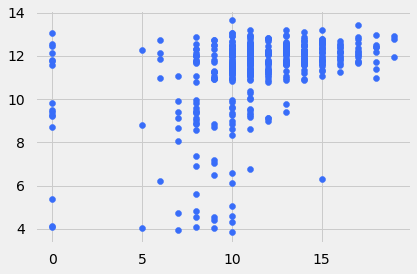

In [60]:
plt.scatter(y_test,predictions)

In [61]:
dalc = array[df['Dalc']]
dalc
#plt.scatter(predictions,dalc)
#sns.distplot(predictions-dalc)

NameError: name 'array' is not defined

This is the histogram plot for the actual test values compared to the predictions

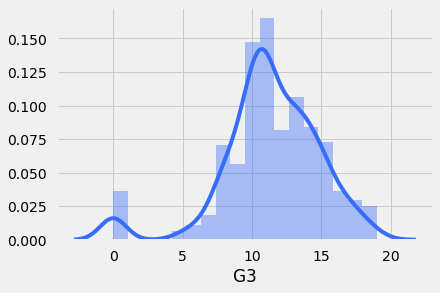

In [87]:
sns.distplot(y_test)

In [63]:
from sklearn import metrics

This is to know the mean squared error for the prediction we made

In [64]:
metrics.mean_squared_error(y_test,predictions)

10.504382674629307

In [65]:
metrics.mean_absolute_error(y_test,predictions)

2.3847883865931778

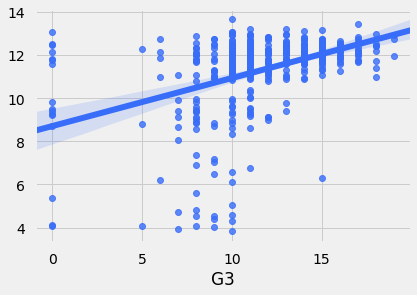

In [79]:
sns.regplot(y_test,predictions);

In [80]:
sns.lmplot(y_test,predictions);

TypeError: lmplot() missing 1 required positional argument: 'data'

In [ ]:
sns.distplot